In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [23]:
df=pd.read_csv("price_data.csv")

In [24]:
df['price']=df['price'].astype(float)
df.head()

,area,price
0,2600,550000.0
1,3000,565000.0
2,3200,610000.0
3,3600,680000.0
4,4000,725000.0


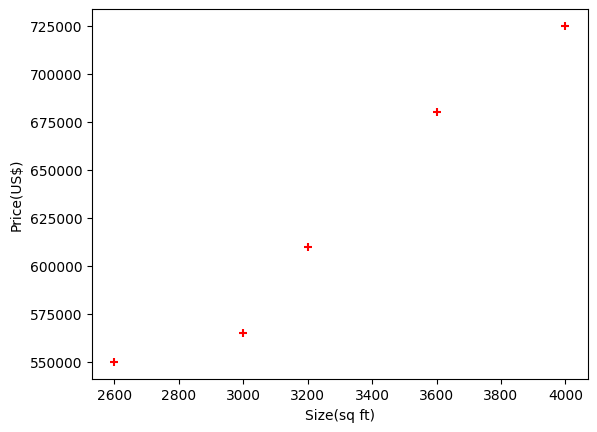

In [25]:
%matplotlib inline
plt.xlabel("Size(sq ft)")
plt.ylabel("Price(US$)")
plt.scatter(df.area,df.price,color='red',marker='+')

In [28]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [32]:
reg.predict(np.array([[3300]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

np.float64(180616.43835616432)

In [41]:
p=pd.read_csv("areas.csv")
p['area']=p['areas'].copy()
d=p.drop('areas',axis='columns')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [42]:
prediction=reg.predict(d)

In [43]:
prediction

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [46]:
d['price']=prediction

In [47]:
d.head()

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [48]:
d.to_csv("prediction.csv",index=False)

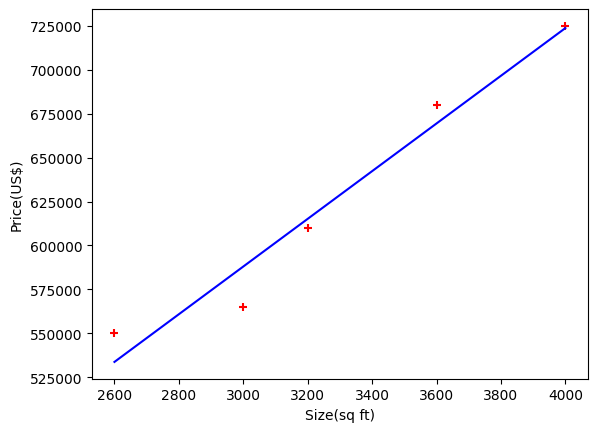

In [49]:
%matplotlib inline
plt.xlabel("Size(sq ft)")
plt.ylabel("Price(US$)")
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')